In [236]:
import pandas as pd 
import csv 
import matplotlib.pyplot as plt

pmms_data = pd.read_csv("PMMS_history.csv")
rental_data = pd.read_csv("Zip_zori_uc_sfrcondomfr_sm_month.csv")

In [306]:
rental_data_df = pd.DataFrame(rental_data)


In [238]:
rental_filtered_df = rental_data[["State", "City", "CountyName", 'RegionName',
                                  "2015-01-31", "2016-01-31", "2017-01-31",
                                  "2018-01-31", "2019-01-31", "2020-01-31",
                                  "2021-01-31", "2022-01-31", "2023-01-31",
                                  "2024-01-31"]].fillna("")
display(rental_filtered_df)


,State,City,CountyName,RegionName,2015-01-31,2016-01-31,2017-01-31,2018-01-31,2019-01-31,2020-01-31,2021-01-31,2022-01-31,2023-01-31,2024-01-31
0,TX,Katy,Fort Bend County,77494,1471.214336,1452.903527,1380.31445,1475.487554,1467.677383,1499.038388,1547.367986,1764.281649,1850.320641,1839.65496
1,NJ,Lakewood,Ocean County,8701,,,,,,,,,,1772.5
2,TX,Katy,Harris County,77449,1285.448996,1318.213954,1298.912311,1370.301129,1382.59469,1414.729477,1491.015679,1691.715721,1777.611107,1830.410884
3,TX,Houston,Harris County,77084,,,1328.740516,1396.014194,1429.346684,1463.514954,1516.330913,1751.842997,1811.758914,1881.000505
4,TX,El Paso,El Paso County,79936,,,,,,,,1226.724085,1376.028266,1430.949495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6627,NV,Las Vegas,Clark County,89158,,,,,,,,,,3037.25
6628,FL,Panama City Beach,Walton County,32461,,,,,,,,,,3545.0
6629,TX,Arlington,Tarrant County,76005,,,,,,,,,1866.379497,1862.293651
6630,NY,New York,New York County,10004,,,4355.935506,4119.5789,4147.520272,4333.072622,3328.712082,4752.515243,4867.356943,5030.416667


In [279]:
cities_to_keep = [
    'New York City', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose', 
    'Austin', 'Jacksonville', 'Fort Worth', 'Columbus', 'Charlotte', 'San Francisco', 'Indianapolis', 'Seattle', 'Denver', 'Washington', 
    'Boston', 'El Paso', 'Nashville', 'Detroit', 'Oklahoma City', 'Portland', 'Las Vegas', 'Memphis', 'Louisville', 'Baltimore', 'Milwaukee', 
    'Albuquerque', 'Tucson', 'Fresno', 'Sacramento', 'Mesa', 'Kansas City', 'Atlanta', 'Long Beach', 'Omaha', 'Raleigh', 'Miami', 'Oakland', 
    'Minneapolis', 'Tulsa', 'Wichita', 'New Orleans', 'Arlington', 'Tampa', 'Saint Louis', 'Anaheim', 'Pittsburgh', 'Cincinnati', 'Toledo', 
    'Riverside', 'Stockton', 'Corpus Christi', 'Newark', 'Buffalo', 'Anchorage', 'Saint Paul', 'Lexington', 'Plano', 'Fort Wayne', 'Saint Petersburg', 
    'Glendale', 'Jersey City', 'Lincoln', 'Henderson', 'Chandler', 'Greensboro', 'Scottsdale', 'Irving', 'Birmingham', 'Gilbert', 'Hialeah', 
    'North Las Vegas', 'Norfolk', 'Chesapeake', 'Garland', 'Irving', 'Fremont', 'Paradise', 'Arlington', 'Akron', 'Rochester', 'Chula Vista', 
    'Montgomery', 'Little Rock', 'Amarillo'
]


# Filter the DataFrame to keep only the rows where the city is in the list of cities to keep
filtered_df = rental_filtered_df[rental_filtered_df['City'].isin(cities_to_keep)]


# Dictionary to store the city with the largest population for each state
max_population_cities = {}

# Convert numeric columns to numeric data types
numeric_columns = filtered_df.columns[4:]
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

for state, group in filtered_df.groupby('State'):
    # Filter numeric columns for the calculation
    numeric_data = group[numeric_columns]
    # Find the row with the largest population for each state
    max_pop_row = group.loc[numeric_data.max(axis=1).idxmax()]
    max_population_cities[state] = max_pop_row

# Create DataFrame from the dictionary values
filtered_df = pd.DataFrame(list(max_population_cities.values()))

# Display the filtered DataFrame
display(filtered_df)


/var/folders/sk/t46j0sx13c1fxdb474v65gy40000gn/T/ipykernel_67836/385091717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')


,State,City,CountyName,RegionName,2015-01-31,2016-01-31,2017-01-31,2018-01-31,2019-01-31,2020-01-31,2021-01-31,2022-01-31,2023-01-31,2024-01-31
5425,AK,Anchorage,Anchorage Borough,99515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000
6565,AL,Birmingham,Jefferson County,35233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1731.311111
5018,AR,Little Rock,Pulaski County,72211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1276.870918,1356.972529,1456.888889
6101,AZ,Scottsdale,Maricopa County,85262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.000000
6591,CA,Los Angeles,Los Angeles County,90067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12353.166667
4362,CO,Denver,Denver County,80238,NaN,NaN,NaN,NaN,2169.020485,2253.639087,2196.415834,2410.713633,2538.752798,2693.309524
6134,DC,Washington,District of Columbia,20037,NaN,NaN,2477.837214,2424.839276,2571.077282,2566.562802,2399.921799,2611.016940,2732.908908,2811.030715
819,DE,Newark,New Castle County,19711,NaN,NaN,NaN,NaN,1619.025475,1670.237464,1777.134438,2119.082335,2331.268873,2373.277778
5239,FL,Miami,Miami-Dade County,33187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3792.500000
6448,GA,Atlanta,Fulton County,30303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2348.677926,2014.083333


In [294]:
plt_df = filtered_df[filtered_df["City"].isin([ "Chicago", "Baltimore", "Long Beach", "Philadelphia", "Seattle", "Milwaukee"])]

columns_to_remove = ["2015-01-31", "2016-01-31"]
plt_df.drop(columns = columns_to_remove)

,State,City,CountyName,RegionName,2017-01-31,2018-01-31,2019-01-31,2020-01-31,2021-01-31,2022-01-31,2023-01-31,2024-01-31
4844,IL,Chicago,Cook County,60654,2334.807705,2419.573870,2494.011440,2569.227316,2181.601914,2551.043593,2766.288705,2795.521014
5854,MD,Baltimore,Baltimore City,21231,1436.005595,1590.655011,1579.659444,1660.005776,1620.118594,1945.962166,1956.426998,2043.595588
3258,NY,Long Beach,Nassau County,11561,1908.459210,2000.636064,2051.281154,2175.142858,2352.133996,2676.250305,2801.061577,3018.262987
6445,PA,Philadelphia,Philadelphia County,19127,1589.444545,1684.141636,1773.394610,1826.742530,1921.069494,2091.302343,2197.847729,2251.479167
5843,WA,Seattle,King County,98101,2079.722111,2200.432337,2262.935644,2432.754053,2085.258676,2453.218345,2445.069300,2535.535458
4196,WI,Milwaukee,Milwaukee County,53202,1331.596667,1279.449999,1281.566132,1333.602953,1337.621957,1428.881791,1511.640996,1556.422009


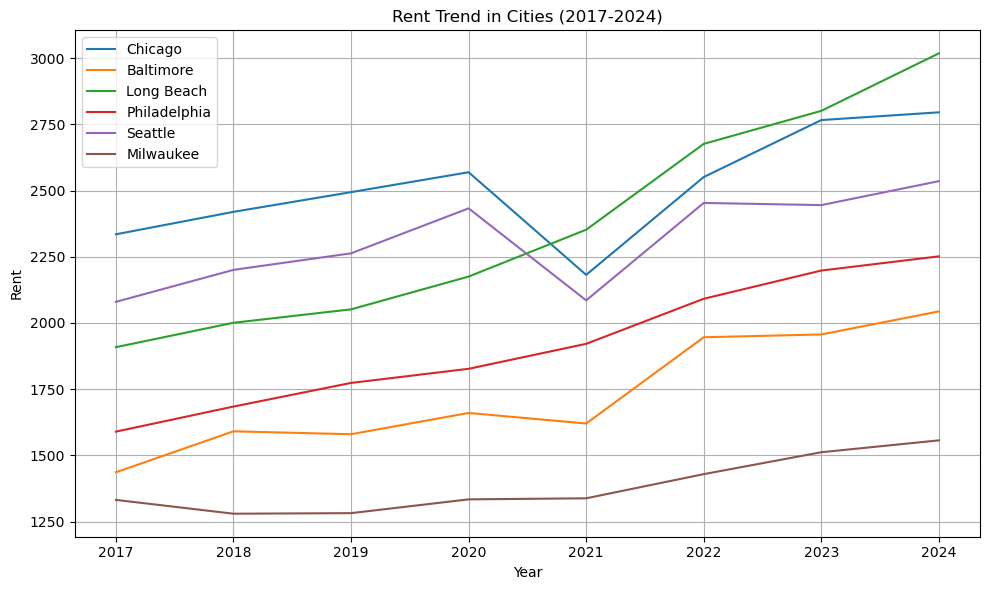

In [299]:
import matplotlib.pyplot as plt
import os


data = {
    "Chicago": [2334.807705, 2419.573870, 2494.011440, 2569.227316, 2181.601914, 2551.043593, 2766.288705, 2795.521014],
    "Baltimore": [1436.005595, 1590.655011, 1579.659444, 1660.005776, 1620.118594, 1945.962166, 1956.426998, 2043.595588],
    "Long Beach": [1908.459210, 2000.636064, 2051.281154, 2175.142858, 2352.133996, 2676.250305, 2801.061577, 3018.262987],
    "Philadelphia": [1589.444545, 1684.141636, 1773.394610, 1826.742530, 1921.069494, 2091.302343, 2197.847729, 2251.479167],
    "Seattle": [2079.722111, 2200.432337, 2262.935644, 2432.754053, 2085.258676, 2453.218345, 2445.069300, 2535.535458],
    "Milwaukee": [1331.596667, 1279.449999, 1281.566132, 1333.602953, 1337.621957, 1428.881791, 1511.640996, 1556.422009]
}


years = range(2017, 2025)

plt.figure(figsize=(10, 6))  

for city, rent_values in data.items():
    plt.plot(years, rent_values, label=city)

plt.xlabel('Year')
plt.ylabel('Rent')
plt.title('Rent Trend in Cities (2017-2024)')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()



In [302]:
city_plots = []
for city in filtered_df["City"]:
    city_plots.append(city)

rent_2024 = []
for rent in filtered_df["2024-01-31"]:
    rent_2024.append(rent)
    


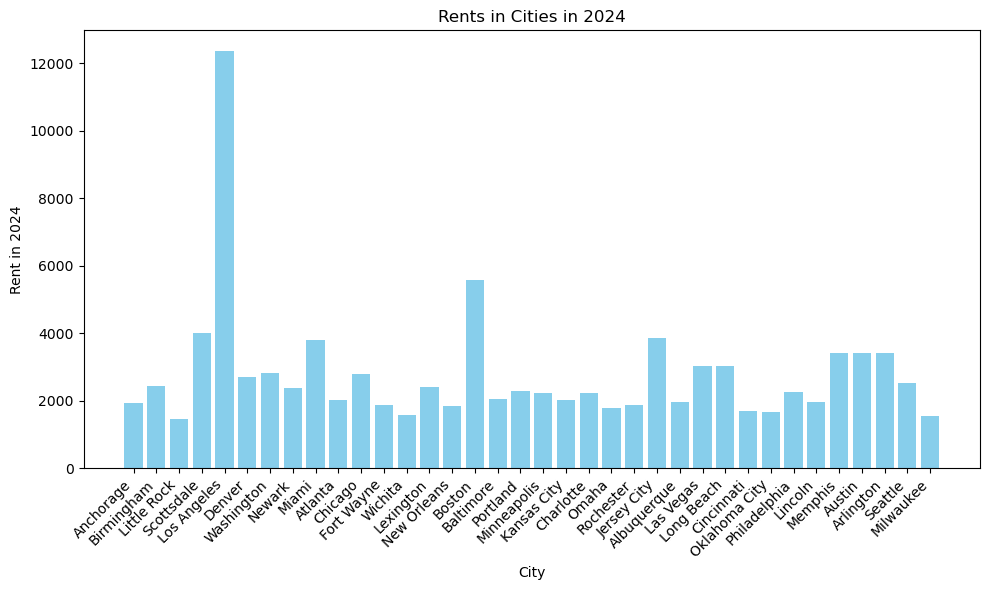

In [303]:
plt.figure(figsize=(10, 6)) 
plt.bar(city_plots, rent_2024, color='skyblue')

plt.xlabel('City')
plt.ylabel('Rent in 2024')
plt.title('Rents in Cities in 2024')

plt.xticks(rotation=45, ha='right')

plt.tight_layout() 
plt.show()

In [83]:
pmms_data_df = pd.DataFrame(pmms_data)
pmms_data_df_redone = pmms_data_df[["date","pmms30"]]

In [84]:
pmms_data_df_redone['date'] = pd.to_datetime(pmms_data_df_redone['date'])

/var/folders/sk/t46j0sx13c1fxdb474v65gy40000gn/T/ipykernel_67836/323107982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pmms_data_df_redone['date'] = pd.to_datetime(pmms_data_df_redone['date'])


In [85]:
pmms_data_filtered_df = pmms_data_df_redone[pmms_data_df_redone["date"] > "2015-01-01"]
pmms_data_filtered_df.reset_index(drop=True, inplace = True)

display(pmms_data_filtered_df)

,date,pmms30
0,2015-01-08,3.73
1,2015-01-15,3.66
2,2015-01-22,3.63
3,2015-01-29,3.66
4,2015-02-05,3.59
...,...,...
471,2024-01-18,6.60
472,2024-01-25,6.69
473,2024-02-01,6.63
474,2024-02-08,6.64


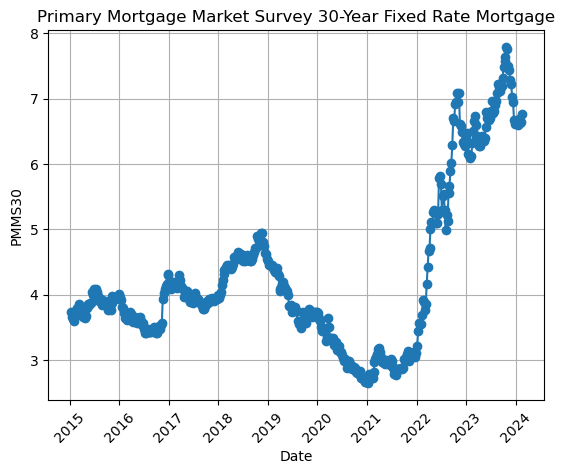

In [304]:
plt.plot(pmms_data_filtered_df["date"], pmms_data_filtered_df["pmms30"], marker="o", linestyle = "-")
plt.xlabel('Date')
plt.ylabel('PMMS30')
plt.title('Primary Mortgage Market Survey 30-Year Fixed Rate Mortgage')

plt.xticks(rotation=45)

plt.grid(True)

plt.show()
